# Sand on road project 

# Layan - Mayar - Dana - Shouq - Haneen - Raneem

In [1]:
#for data processing
import numpy as np
import pandas as pd

#for data visulization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots #Importing Plotly scientific graphing library for making subplots
import plotly.graph_objects as go


from sklearn.preprocessing import StandardScaler #For scalling numeric data
from sklearn.model_selection import train_test_split #For splitting data

#for modelling 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

#for evaluation
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [2]:
#loading the data from excel file to pandas dataframe
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

class                            image_path           name  xmax  xmin  \
0      3  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE   797   701   
1      3  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE   932   786   
2      3  4a48c42c9579ec0399e6c5a3e825e765.jpg        GARBAGE   736   657   
3      7  ea906a663da6321bcef78be4b7d1afff.jpg  BAD_BILLBOARD   986   786   
4      8  1c7d48005a12d1b19261b8e71df7cafe.jpg   SAND_ON_ROAD   667   549   

   ymax  ymin  sand classes  
0   262   211             0  
1   329   238             0  
2   275   229             0  
3   136     0             0  
4   228   179             1

# Data Cleaning

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   class         19950 non-null  int64 
 1   image_path    19950 non-null  object
 2   name          19950 non-null  object
 3   xmax          19950 non-null  int64 
 4   xmin          19950 non-null  int64 
 5   ymax          19950 non-null  int64 
 6   ymin          19950 non-null  int64 
 7   sand classes  19950 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


In [5]:
#Chech the shape of original dataset
df_train.shape

(19950, 8)

In [6]:
#Chech the size of original dataset
df_train.size

159600

In [7]:
print(f"Number of train images: {df_train.shape[0]}")
print(f"Number of test images: {df_test.shape[0]}")

Number of train images: 19950
Number of test images: 2092


In [8]:
#Check for duplicated data
df_train.duplicated().any()

False

In [9]:
#Check the missing values
df_train.isnull().sum()

class           0
image_path      0
name            0
xmax            0
xmin            0
ymax            0
ymin            0
sand classes    0
dtype: int64

In [10]:
df_train.columns

Index(['class', 'image_path', 'name', 'xmax', 'xmin', 'ymax', 'ymin',
       'sand classes'],
      dtype='object')

# EDA (Exploratory Data Analysis)

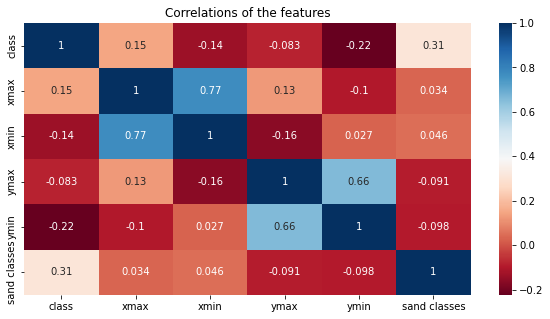

In [11]:
# Discover correlation coefficient
plt.figure(figsize = (10,5)) #size of heatmap 10*5
sns.heatmap(df_train.corr(),annot=True, cmap="RdBu") #draw the heatmap
plt.title('Correlations of the features')
plt.show()

/Users/razanaljuhani/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: No SAND ON ROAD || 1: SAND ON ROAD)')

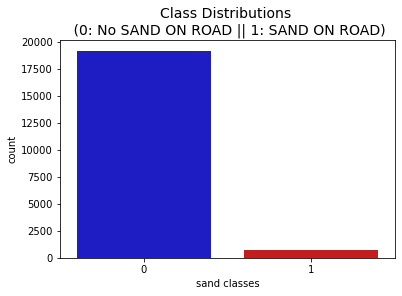

In [12]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('sand classes', data=df_train, palette=colors)
plt.title('Class Distributions \n (0: No SAND ON ROAD || 1: SAND ON ROAD)', fontsize=14)

In [13]:
print('No SAND ON ROAD', round(df_train['sand classes'].value_counts()[0]/len(df_train) * 100,2), '% of the dataset')
print('SAND ON ROAD', round(df_train['sand classes'].value_counts()[1]/len(df_train) * 100,2), '% of the dataset')

No SAND ON ROAD 96.25 % of the dataset
SAND ON ROAD 3.75 % of the dataset


Note: Only 3.75%) of images have sand on the road. That means the data is highly unbalanced with respect with target variable sand classes.
